In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

In [2]:
df = pd.read_csv(r'D:\Data Science\udemy\Notebooks\DATA\data_banknote_authentication.csv')

In [3]:
df.head()

,Variance_Wavelet,Skewness_Wavelet,Curtosis_Wavelet,Image_Entropy,Class
0,3.62160,8.6661,-2.8073,-0.44699,0
1,4.54590,8.1674,-2.4586,-1.46210,0
2,3.86600,-2.6383,1.9242,0.10645,0
3,3.45660,9.5228,-4.0112,-3.59440,0
4,0.32924,-4.4552,4.5718,-0.98880,0


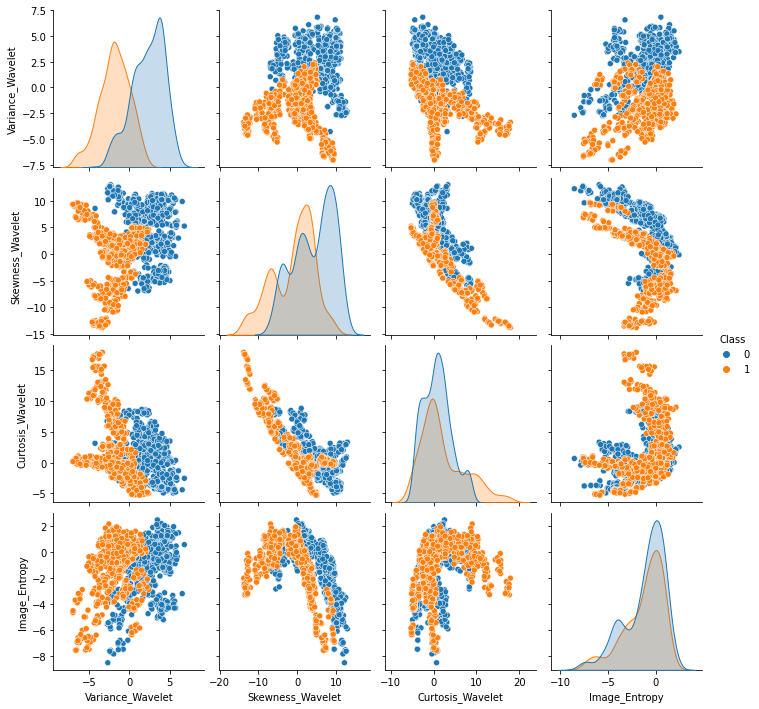

In [5]:
sns.pairplot(df, hue='Class')
plt.show()

In [6]:
X = df.drop('Class',axis=1)

In [7]:
y = df.Class

In [8]:
from sklearn.model_selection import train_test_split

In [10]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.15, random_state=101)

In [11]:
from sklearn.model_selection import GridSearchCV

In [12]:
from sklearn.ensemble import RandomForestClassifier

In [21]:
n_estimators = [64, 100, 128, 200]
max_features = [2, 3, 4]
bootstrap = [True, False]
oob_score = [True, False]
criterion = ['gini', 'entropy', 'log_loss']

In [22]:
param_grid = {
    'n_estimators': n_estimators,
    'max_features': max_features,
    'bootstrap': bootstrap,
    'oob_score': oob_score,
    'criterion': criterion
}

In [23]:
grid_model = GridSearchCV(RandomForestClassifier(), param_grid)

In [24]:
grid_model.fit(X_train, y_train)

c:\users\lenovo\appdata\local\programs\python\python39\lib\site-packages\sklearn\model_selection\_validation.py:378: FitFailedWarning: 
180 fits failed out of a total of 720.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
180 fits failed with the following error:
Traceback (most recent call last):
  File "c:\users\lenovo\appdata\local\programs\python\python39\lib\site-packages\sklearn\model_selection\_validation.py", line 686, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "c:\users\lenovo\appdata\local\programs\python\python39\lib\site-packages\sklearn\ensemble\_forest.py", line 437, in fit
    raise ValueError("Out of bag estimation only available if bootstrap=True")
ValueError: Out of bag estimation only a

GridSearchCV(estimator=RandomForestClassifier(),
             param_grid={'bootstrap': [True, False],
                         'criterion': ['gini', 'entropy', 'log_loss'],
                         'max_features': [2, 3, 4],
                         'n_estimators': [64, 100, 128, 200],
                         'oob_score': [True, False]})

In [26]:
grid_model.best_params_

{'bootstrap': True,
 'criterion': 'entropy',
 'max_features': 2,
 'n_estimators': 128,
 'oob_score': False}

In [27]:
rcf_ = RandomForestClassifier(bootstrap=True,
 criterion='entropy',
 max_features=  2,
 n_estimators=  128,
 oob_score= True)

In [28]:
rcf_.fit(X_train, y_train)

RandomForestClassifier(criterion='entropy', max_features=2, n_estimators=128,
                       oob_score=True)

In [30]:
rcf_.oob_score_

0.9939965694682675

In [31]:
y_pred = rcf_.predict(X_test)

In [32]:
y_pred

array([0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 1, 0, 1, 0, 0,
       0, 1, 1, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 0, 1, 0, 1,
       1, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       1, 0, 1, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0,
       1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 1, 1,
       0, 1, 0, 0, 0, 1, 1, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0,
       0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 1, 1, 0, 1, 1, 1,
       1, 1, 0, 0, 1, 1, 0, 1, 0, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0,
       1, 1, 1, 0, 1, 0, 0, 1, 1, 0, 0, 0, 1, 1, 0, 0, 1, 0, 1, 0, 0, 0,
       0, 0, 1, 1, 0, 1, 1, 0], dtype=int64)

In [38]:
from sklearn.metrics import classification_report, plot_confusion_matrix, accuracy_score

In [34]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       1.00      0.99      1.00       124
           1       0.99      1.00      0.99        82

    accuracy                           1.00       206
   macro avg       0.99      1.00      0.99       206
weighted avg       1.00      1.00      1.00       206



c:\users\lenovo\appdata\local\programs\python\python39\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


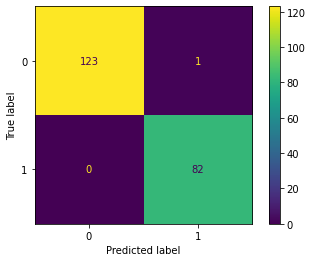

In [37]:
plot_confusion_matrix(rcf_, X_test, y_test)
plt.show()

In [40]:
errors = list()
mis_class = list()

for i in range(1, 200):
    rfc_ = RandomForestClassifier(n_estimators = i, criterion='entropy', max_features=  2, oob_score= True)
    rfc_.fit(X_train, y_train)
    y_pred = rfc_.predict(X_test)
    err = 1 - accuracy_score(y_test, y_pred)
    n_mis = np.sum(y_pred != y_test)
    errors.append(err)
    mis_class.append(n_mis)

c:\users\lenovo\appdata\local\programs\python\python39\lib\site-packages\sklearn\ensemble\_forest.py:586: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable OOB estimates.
  warn(
c:\users\lenovo\appdata\local\programs\python\python39\lib\site-packages\sklearn\ensemble\_forest.py:586: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable OOB estimates.
  warn(
c:\users\lenovo\appdata\local\programs\python\python39\lib\site-packages\sklearn\ensemble\_forest.py:586: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable OOB estimates.
  warn(
c:\users\lenovo\appdata\local\programs\python\python39\lib\site-packages\sklearn\ensemble\_forest.py:586: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable OOB estimates.
  warn(
c:\users\lenovo\

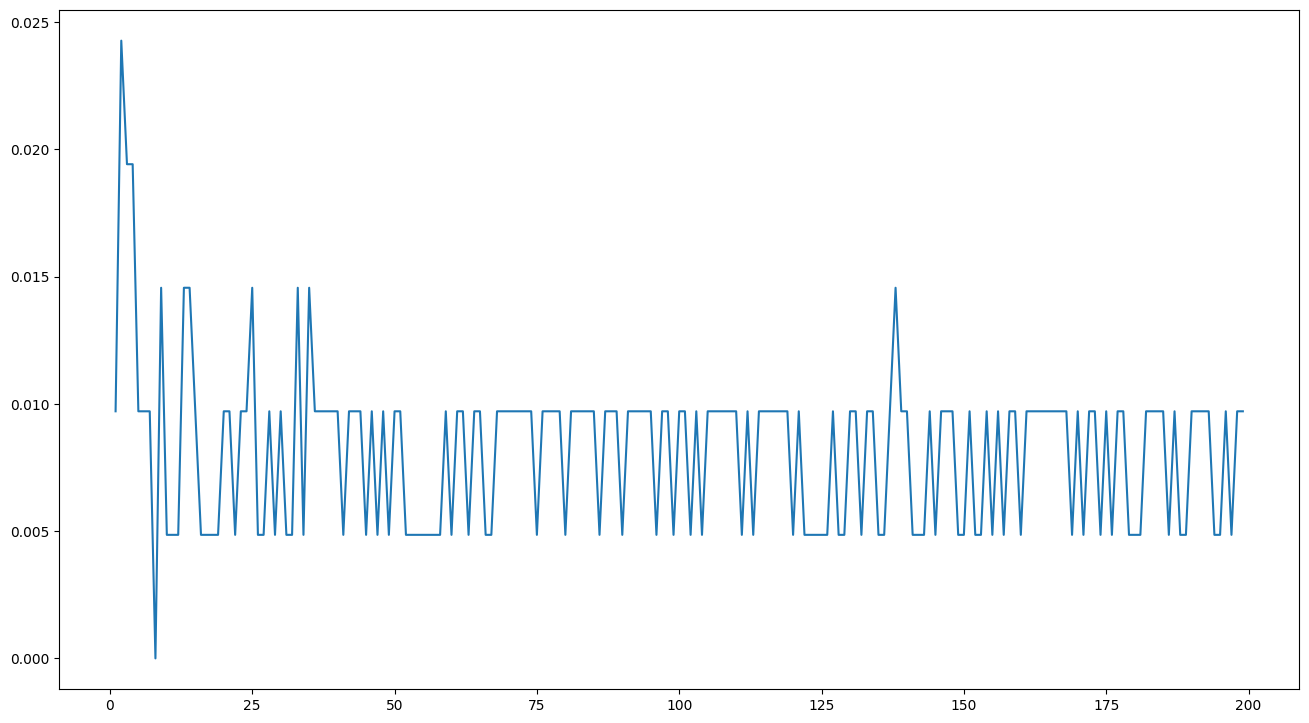

In [45]:
plt.figure(figsize=(16, 9), dpi = 100)
plt.plot(range(1, 200), errors)
plt.show()

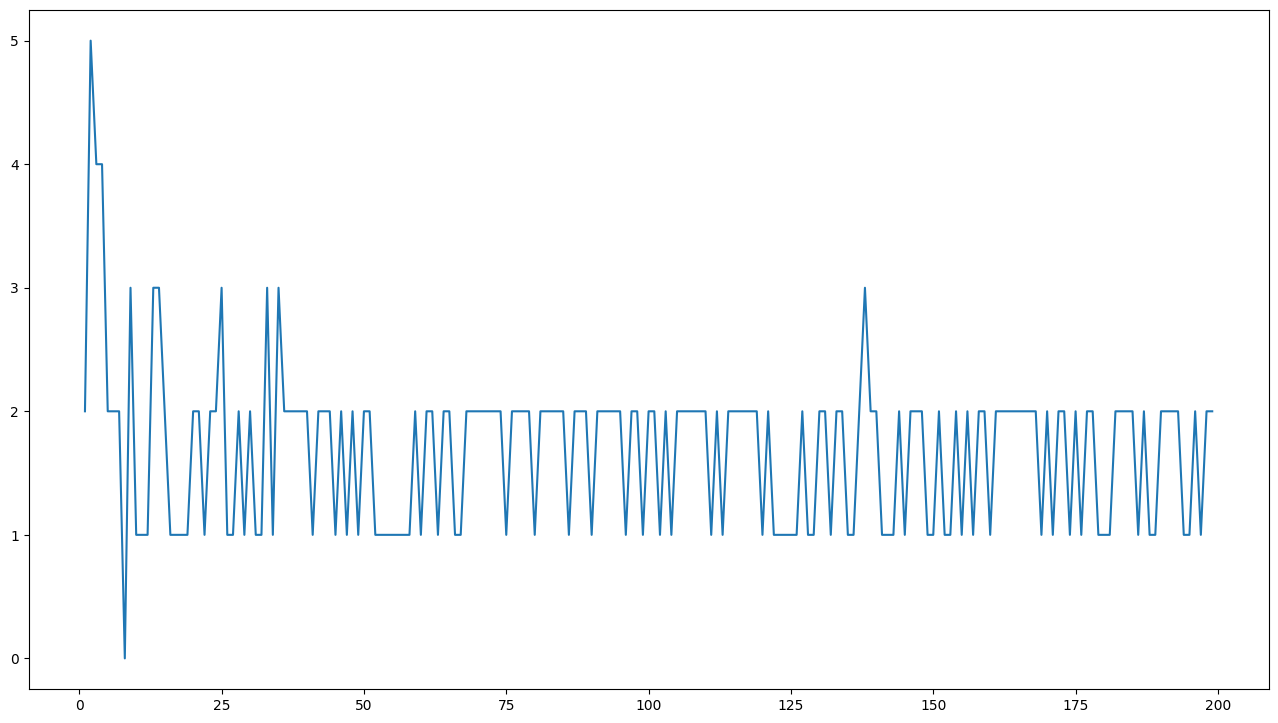

In [46]:
plt.figure(figsize=(16, 9), dpi = 100)
plt.plot(range(1, 200), mis_class)
plt.show()